## Web Scraping Project

### เขียนบทนำเกี่ยวกับโปรเจ็กต์ อธิบายวัตถุประสงค์และความสำคัญของการวิเคราะห์ข้อมูลจากเว็บ

ขั้นตอนที่ 1 การดึงข้อมูลจากเว็บ (Web Scraping) 

In [6]:
# import web grabbing client and
# HTML parser
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
 
# variable to store website link as string
myurl = 'http://books.toscrape.com/index.html'
 
# grab website and store in variable uclient
uClient = uReq(myurl)
 
# read and close HTML
page_html = uClient.read()
uClient.close()
 
# call BeautifulSoup for parsing
page_soup = soup(page_html, "html.parser")
 
# grabs all the products under list tag
bookshelf = page_soup.findAll(
    "li", {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"})
 
# create csv file of all products
filename = ("Books1.csv")
f = open(filename, "w")
 
headers = "Book title, Price\n"
f.write(headers)
 
for books in bookshelf:
 
    # collect title of all books
    book_title = books.h3.a["title"]
 
    # collect book price of all books
    book_price = books.findAll("p", {"class": "price_color"})
    price = book_price[0].text.strip()

            
    # If book_title or book_price contains a comma, enclose in quotes
    if "," in book_title:
        book_title = f'"{book_title}"'
    if "," in book_price:
        book_price = f'"{book_price}"'
 
    print("Title of the book :" + book_title)
    print("Price of the book :" + price)
 
    f.write(book_title + "," + price+"\n")
 
f.close()

Title of the book :A Light in the Attic
Price of the book :£51.77


UnicodeEncodeError: 'charmap' codec can't encode character '\xa3' in position 21: character maps to <undefined>

In [7]:
# import web grabbing client and
# HTML parser
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import csv
 
# variable to store website link as string
myurl = 'http://books.toscrape.com/index.html'
 
# grab website and store in variable uclient
uClient = uReq(myurl)
 
# read and close HTML
page_html = uClient.read()
uClient.close()

# call BeautifulSoup for parsing
page_soup = soup(page_html, "html.parser")
 
# grabs all the products under list tag
bookshelf = page_soup.findAll( "li", {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"})
 
# create csv file of all products
filename = ("Books2.csv")
f = open(filename, mode="w", newline="", encoding="utf-8")
writer = csv.writer(f)
 
writer.writerow(["Book Title", "Price"])
 
for books in bookshelf:
 
    # collect title of all books
    book_title = books.h3.a["title"]
 
    # collect book price of all books
    book_price = books.findAll("p", {"class": "price_color"})
    price = book_price[0].text.strip()
 
    print("Title of the book :" + book_title)
    print("Price of the book :" + price)
 
    writer.writerow([book_title, price])
 
f.close()

Title of the book :A Light in the Attic
Price of the book :£51.77
Title of the book :Tipping the Velvet
Price of the book :£53.74
Title of the book :Soumission
Price of the book :£50.10
Title of the book :Sharp Objects
Price of the book :£47.82
Title of the book :Sapiens: A Brief History of Humankind
Price of the book :£54.23
Title of the book :The Requiem Red
Price of the book :£22.65
Title of the book :The Dirty Little Secrets of Getting Your Dream Job
Price of the book :£33.34
Title of the book :The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price of the book :£17.93
Title of the book :The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price of the book :£22.60
Title of the book :The Black Maria
Price of the book :£52.15
Title of the book :Starving Hearts (Triangular Trade Trilogy, #1)
Price of the book :£13.99
Title of the book :Shakespeare's Sonnets
Price of the book :£20.66
Title of the book :Set

In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://books.toscrape.com/'
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

# Assuming categories are listed in a sidebar or specific section
category_container = soup.find('div', {'class': 'side_categories'})
categories = category_container.find_all('a')

Categories = []

for category in categories:
    category_name = category.get_text().strip()
    category_link = url + category['href']
    # print(category_name, category_link)
    Categories.append({"Category":category_name,"Link":category_link})

for c in Categories:
    print(c['Category'],c["Link"])

Books https://books.toscrape.com/catalogue/category/books_1/index.html
Travel https://books.toscrape.com/catalogue/category/books/travel_2/index.html
Mystery https://books.toscrape.com/catalogue/category/books/mystery_3/index.html
Historical Fiction https://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html
Sequential Art https://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html
Classics https://books.toscrape.com/catalogue/category/books/classics_6/index.html
Philosophy https://books.toscrape.com/catalogue/category/books/philosophy_7/index.html
Romance https://books.toscrape.com/catalogue/category/books/romance_8/index.html
Womens Fiction https://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html
Fiction https://books.toscrape.com/catalogue/category/books/fiction_10/index.html
Childrens https://books.toscrape.com/catalogue/category/books/childrens_11/index.html
Religion https://books.toscrape.com/catalogue/category/bo

In [9]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from urllib.parse import urljoin  # Import the urljoin function

Extracted_links = []

for i in range(49):
    # Correct the base URL to the root of the book listings
    base_url = f'https://books.toscrape.com/catalogue/category/books_1/page-{i + 1}.html'

    # Open connection and grab the main page
    uClient = uReq(base_url)
    page_html = uClient.read()
    uClient.close()

    # HTML parsing
    page_soup = soup(page_html, "html.parser")

    # Find the correct link by inspecting where the relative links start
    for bookLink in page_soup.findAll("h3"):
       Extracted_links.append(urljoin(base_url, bookLink.find('a')['href']))

# Print the correctly formed URLs
for link in Extracted_links:
    print(link)


https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
https://books.toscrape.com/catalogue/soumission_998/index.html
https://books.toscrape.com/catalogue/sharp-objects_997/index.html
https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html
https://books.toscrape.com/catalogue/the-requiem-red_995/index.html
https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
https://books.toscrape.com/catalogue/the-black-maria_991/index.html
https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html
https://books.toscr

In [10]:
print(Extracted_links)

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html', 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html', 'https://books.toscrape.com/catalogue/soumission_998/index.html', 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html', 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html', 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html', 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html', 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html', 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html', 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html', 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_99

In [11]:
import csv
import requests
from bs4 import BeautifulSoup as soup

number_mapping = {
"One": 1,
"Two": 2,
"Three": 3,
"Four": 4,
"Five": 5
}   

# Test_links = ["https://books.toscrape.com/catalogue/hawkeye-vol-1-my-life-as-a-weapon-hawkeye-1_24/index.html","https://books.toscrape.com/catalogue/having-the-barbarians-baby-ice-planet-barbarians-75_23/index.html"]

# Create CSV file of all products
filename = "Books_data.csv"
with open(filename, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    
    # Write header row
    writer.writerow(["Genre", "Book Title", "Price", "Rating", "Stock Status", "Number of Reviews"])

    # Loop through each collected book link to access detail pages
    for link in Extracted_links:
        # Fetch the detail page
        response = requests.get(link)
        detail_html = response.text
        
        # HTML parsing for detail page
        detail_soup = soup(detail_html, "html.parser")

        # Extracting detailed product information
        product_info = {row.th.text: row.td.text for row in detail_soup.findAll("tr")}
        category = detail_soup.find('ul', class_="breadcrumb").find_all('a')[2].text.strip()
        title = detail_soup.find('h1').text
        price = product_info.get("Price (incl. tax)")
        rating = number_mapping.get(detail_soup.find('p', class_="star-rating")['class'][1], "Invalid input")
        stock_status = product_info.get("Availability")
        number_of_reviews = product_info.get("Number of reviews")

        # Write the product details to the CSV
        writer.writerow([category, title, price, rating, stock_status, number_of_reviews])

        print(title, "finished")

A Light in the Attic finished
Tipping the Velvet finished
Soumission finished
Sharp Objects finished
Sapiens: A Brief History of Humankind finished
The Requiem Red finished
The Dirty Little Secrets of Getting Your Dream Job finished
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull finished
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics finished
The Black Maria finished
Starving Hearts (Triangular Trade Trilogy, #1) finished
Shakespeare's Sonnets finished
Set Me Free finished
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) finished
Rip it Up and Start Again finished
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 finished
Olio finished
Mesaerion: The Best Science Fiction Stories 1800-1849 finished
Libertarianism for Beginners finished
It's Only the Himalayas finished
In Her Wake finished
How Music Works finished
Foolproof Preserving: A Guide to Small Batch Ja

KeyboardInterrupt: 

ขั้นตอนที่ 2 การทำความสะอาดและเตรียมข้อมูล (Data Cleaning and Preparation)

In [4]:
import pandas as pd

df = pd.read_csv('Books_data.csv')

print(df.info())   # ตรวจสอบชนิดของข้อมูลในแต่ละคอลัมน์และจำนวนข้อมูลที่ไม่เป็น null
print(df.duplicated().sum())    # ตรวจสอบข้อมูลที่ซ้ำกัน
df['Price'] = df['Price'].str.replace('[Ã‚Â£]', '', regex=True) #ลบสกุลเงินออก
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]  # ตรวจสอบค่า Rating ที่ไม่อยู่ในช่วงที่เหมาะสม (1-5)
df = df[df['Price'] > 0]    # ตรวจสอบราคาหนังสือที่อาจไม่สมเหตุสมผล

duplicate_count = df.duplicated(subset=['Book Title']).sum()
print(duplicate_count)

# ตรวจสอบแถวที่มีชื่อซ้ำ
duplicates = df[df.duplicated(subset=['Book Title'], keep=False)]
# หาและนับชื่อที่ซ้ำ
duplicate_titles = duplicates['Book Title'].value_counts()

print(duplicate_titles)

df = df.drop(columns = "Number of Reviews")

df.to_csv('cleaned_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Genre              980 non-null    object
 1   Book Title         980 non-null    object
 2   Price              980 non-null    object
 3   Rating             980 non-null    int64 
 4   Stock Status       980 non-null    object
 5   Number of Reviews  980 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 46.1+ KB
None
0
1
Book Title
The Star-Touched Queen    2
Name: count, dtype: int64


ขั้นตอนที่ 3 การวิเคราะห์ข้อมูล (Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูลที่ cleanแล้ว
df = pd.read_csv('cleaned_data.csv')

# คำนวนหาค่า mean
mean_price = df['Price'].mean()

# จัดกลุ่มและนับจำนวนจากนั้นเรียงจากมากไปน้อย
grouped_genre = df.groupby('Genre').size()
ranking_genre = grouped_genre.sort_values(ascending=False)
#มุงลองทำ box plot ระหว่างgenre and price ดูกุว่ามีไรแปลกๆ

# แนวโน้มของราคาเฉลี่ยตามประเภท
genre_mean_price = df.groupby('Genre')['Price'].mean().sort_values(ascending=False)

# แนวโน้มของ Stock Status ในแต่ละประเภทหนังสือ (Genre)
stock_trend = df.groupby('Genre')['Stock Status'].mean().sort_values(ascending=False)

# จัดกลุ่มของRatingและทำการหาค่าเฉลี่ยของStock Status
stock_status_by_rating = df.groupby('Rating')['Stock Status'].mean()

test = df.groupby('Rating')['Price'].mean()
test


Rating
1    34.329774
2    34.804175
3    34.747323
4    36.011136
5    35.442618
Name: Price, dtype: float64

ขั้นตอนที่ 4 การสร้างภาพข้อมูล (Visualization)

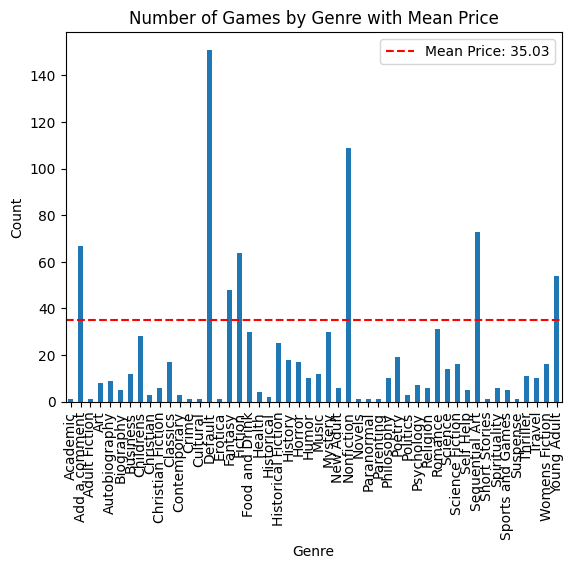

In [12]:
# สร้างกราฟ
fig, ax = plt.subplots()
grouped_genre.plot(kind='bar', ax=ax)

# วาดเส้นแนวขวางที่ mean_price
ax.axhline(mean_price, color='r', linestyle='--', label=f'Mean Price: {mean_price:.2f}')

# เพิ่มชื่อให้กับแกนและกราฟ
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Number of Games by Genre with Mean Price')

# แสดง legend
ax.legend()

# แสดงผลกราฟ
plt.show()

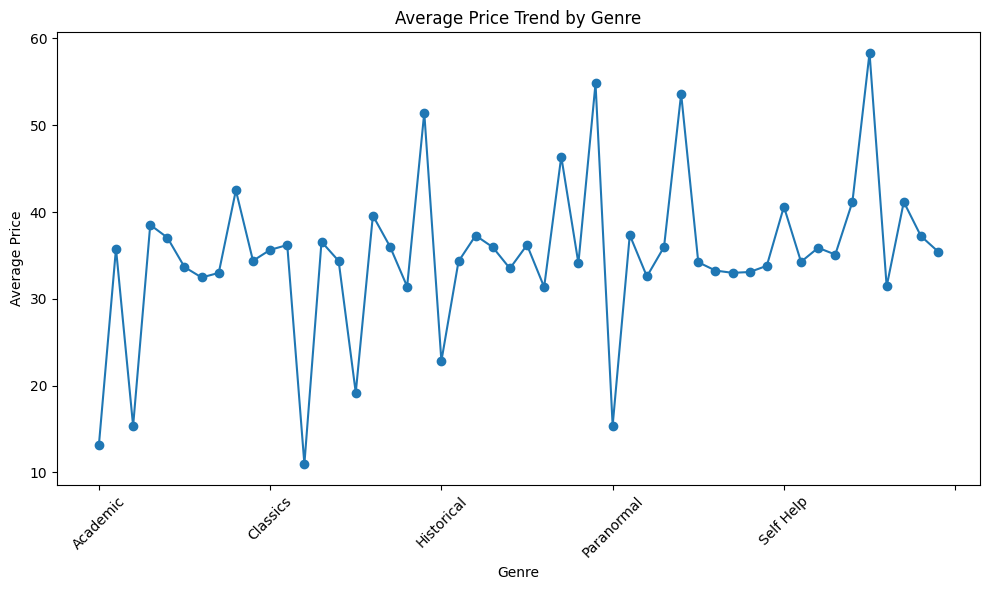

In [15]:
plt.figure(figsize=(10, 6))

grouped_mean_price = df.groupby('Genre')['Price'].mean()
grouped_mean_price.plot(kind='line', marker='o')

# เพิ่มชื่อให้กับแกนและกราฟ
plt.xlabel('Genre')
plt.ylabel('Average Price')
plt.title('Average Price Trend by Genre')

# หมุนป้ายชื่อแกน X เพื่อให้เห็นได้ชัดเจน
plt.xticks(rotation=45)

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

In [17]:
print(df['Stock Status'].unique())

['In stock (22 available)' 'In stock (20 available)'
 'In stock (19 available)' 'In stock (18 available)'
 'In stock (17 available)' 'In stock (16 available)'
 'In stock (15 available)' 'In stock (14 available)'
 'In stock (13 available)' 'In stock (12 available)'
 'In stock (11 available)' 'In stock (10 available)'
 'In stock (9 available)' 'In stock (8 available)'
 'In stock (7 available)' 'In stock (6 available)'
 'In stock (5 available)' 'In stock (4 available)'
 'In stock (3 available)' 'In stock (2 available)'
 'In stock (1 available)']


In [25]:
import re 

def extract_stock(status):
    if isinstance(status, str):
        match = re.search(r'\((\d+) available\)', status)
        return int(match.group(1)) if match else None
    return None  # กรณีที่ไม่ใช่สตริงหรือไม่มีข้อมูล

df['Stock Status'] = df['Stock Status'].apply(extract_stock)

In [16]:
plt.figure(figsize=(10, 6))

grouped_mean_stock = df.groupby('Genre')['Stock Status'].mean()
grouped_mean_stock.plot(kind='line', marker='o')

# เพิ่มชื่อให้กับแกนและกราฟ
plt.xlabel('Genre')
plt.ylabel('Average Stock Left')
plt.title('Average Remaining Stock Trend by Genre')

# หมุนป้ายชื่อแกน X เพื่อให้เห็นได้ชัดเจน
plt.xticks(rotation=45)

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1000x600 with 0 Axes>